In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
%matplotlib inline

# Data-driven Business and Behaviour Analytics (DBBA)
# Tutorial: 2 - Paths, directed paths and connected components

## Paths
By definition, a __path__ in an undirected network is a sequence of edges connecting two nodes. Let's see in a simple plot!

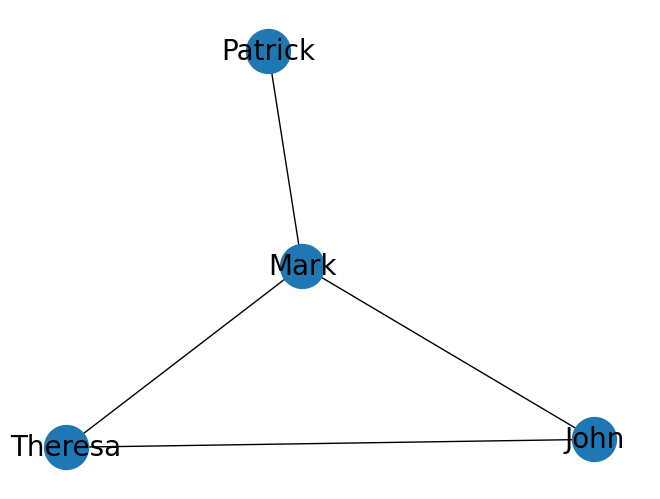

In [48]:
G = nx.Graph()

G.add_nodes_from(["Mark", "John", "Theresa", "Patrick"])

G.add_edges_from([("Mark","John"),("John","Theresa"),("Mark","Theresa"),("Mark","Patrick")])

nx.draw(G, with_labels=True,
        node_size=1000,
        font_size=20)


In [18]:
nx.has_path(G, "Mark", "Patrick") # we check that a path exists between Mark and Patrick

True

Generally speaking, the paths between nodes are not unique as we could cover the same links in cycle endlessly trying to reach the target node, that is why we are interested in more useful concepts. For instance, a __simple path__ is one without any cycles (i.e., paths that go from one node back to itself).

In [19]:
list(nx.all_simple_paths(G, "Theresa", "Patrick"))

[['Theresa', 'John', 'Mark', 'Patrick'], ['Theresa', 'Mark', 'Patrick']]

We have just seen that more than one simple path are possible between two nodes in our network. Often, it is of interest to compute or to consider the one consisting of the smallest number of edges. In a word, we want to compute the __shortest path__.

In [20]:
nx.shortest_path(G, "Theresa", "Patrick")

['Theresa', 'Mark', 'Patrick']

Instead, if we need its length only, we can use another function, `shortest_path_length()`. Note: in network science, the path length is defined as the number of links, not of the nodes, which implies

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
    
for nodes ***u*** and ***v***.

In [21]:
nx.shortest_path_length(G, "Theresa", "Patrick")

2

## Connectedness



So far, we considered only networks in which any pair of nodes is connected by a path. Unsurprisingly, this kind of network is called __connected__ and NetworkX provides a method to check this property.

In [22]:
nx.is_connected(G)

True

It can happen that for two nodes in a network there is no path connecting them.

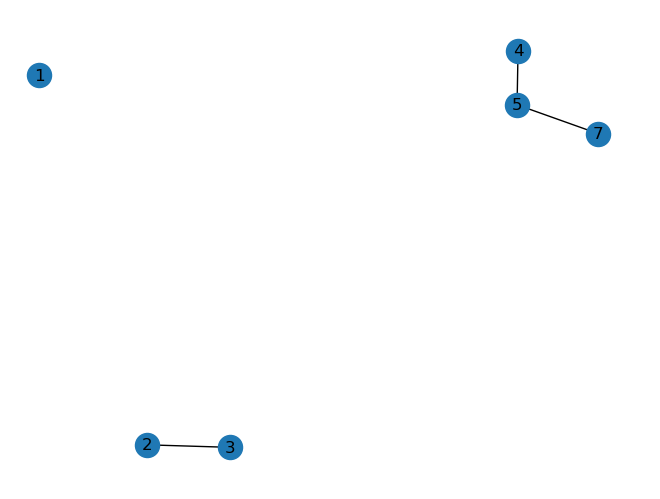

In [23]:
G_not_connected = nx.Graph()

G_not_connected.add_nodes_from((1,2,3, 7))
G_not_connected.add_edge(2,3)
G_not_connected.add_edge(4,5)
G_not_connected.add_edge(7,5)

nx.draw(G_not_connected, with_labels=True)

In [24]:
nx.is_connected(G_not_connected)

False

Because there is no unique component, we can investigate further the number and the structure of the different components.

In [25]:
nx.number_connected_components(G_not_connected)

3

In [26]:
components = list(nx.connected_components(G_not_connected))
for i in components:
    print(i, ", then with dimension:", len(i))

{1} , then with dimension: 1
{2, 3} , then with dimension: 2
{4, 5, 7} , then with dimension: 3


One of the most significative analysis is usually performed by taking into account the largest component. Now, we can use the `max()` function (which thanks to `key=len` sorts with respect to the length of the components) to get the component with the largest number of nodes.

In [27]:
largest_component = max(nx.connected_components(G_not_connected), key=len)

To better analyse the largest component, we can build a subgraph of the original network induced by the nodes from the first component.

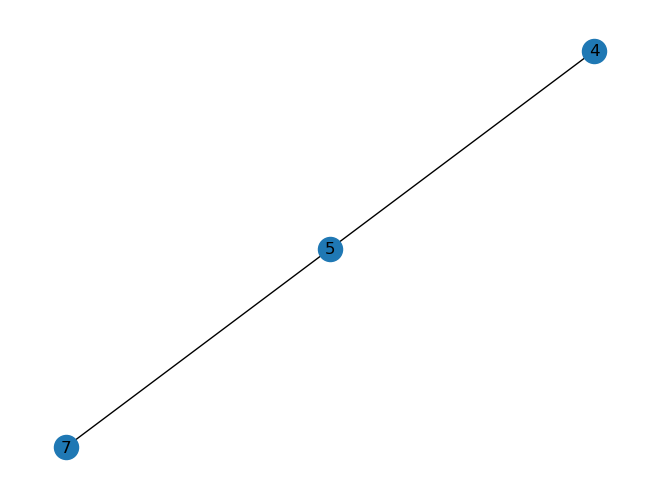

In [28]:
induced_subgraph = G_not_connected.subgraph(largest_component)

nx.draw(induced_subgraph, with_labels=True)

## Paths and components in directed networks

Likewise, we can operate in directed networks. Here the relationships are not symmetrical and therefore any kind of path must follow the forward direction.

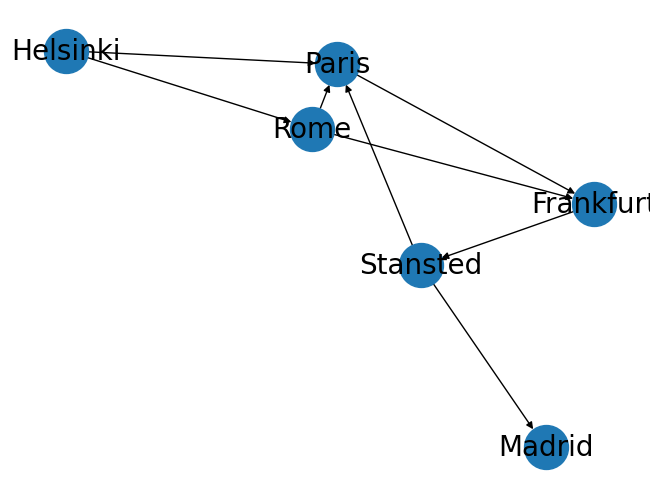

In [29]:
D = nx.DiGraph()

D.add_edges_from([
    ("Frankfurt","Stansted"),
    ("Stansted","Madrid"),
    ("Rome","Frankfurt"), ("Helsinki","Rome"), ("Stansted","Paris"),
    ("Rome","Paris"), ("Helsinki","Paris"), ("Paris","Frankfurt")
])

nx.draw(D, with_labels=True,         
        node_size=1000,
        font_size=20)

In [30]:
nx.has_path(D, "Paris", "Frankfurt")

True

In [31]:
nx.has_path(D, "Frankfurt", "Rome")

False

And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [32]:
try:
  nx.shortest_path(D, "Frankfurt", "Rome")

except nx.NetworkXNoPath as err:
  print(err)

No path between Frankfurt and Rome.


Moving from undirected network to __directed__ ones, the concept of connectivity becomes more sophisticated. The __strong__ version means that a directed path (i.e., a path following the edge directin) exists for any two nodes.

In [33]:
nx.is_strongly_connected(D)

False

Instead, the __weak connectivity__ considers any path between nodes, regardless of edge direction.

In [34]:
nx.is_weakly_connected(D)

True

In [35]:
import networkx as nx
import pandas as pd

exposuredf = pd.read_csv('exposure_dataset.csv')
G = nx.from_pandas_edgelist(exposuredf, edge_attr='weight', create_using=nx.DiGraph())

In [36]:
nx.is_weakly_connected(G)

True

# **EXERCISE 1**

The file "exposure_dataset.csv" contains data on the aggregated banking exposure between countries. The weights represent the amount of money that banks from a country loaned to banks from another country.

1.a Filter the network by removing edges whose weight is less than 1000. \
1.b Compute the density of the network. \
1.c Does there exist a path in the network between every possible pair of countries? \
1.d Repeat points 1.a, 1.b, and 1.c but this time remove all weights less than 100000. \
1.e Discuss these results.

## Our Solution

Filtering nodes or edges from a network can be easily achieved using the library function `nx.subgraph_view`.
We merely have to provide a suitable function argument, shown below.
As before, we can use `nx.is_strongly_connected` to tell if these filtered networks remain fully connected, answering the question about whether paths exist between every pair of countries.

In [37]:
def absolute_filter(G, k):
    G_filtered = nx.subgraph_view(G, filter_edge = lambda s, t: G.edges[s, t]['weight'] >= k) 

    print(f"Filter loan amount >= {k:.0}:")
    print(f"\t{len(G_filtered.edges)} of {len(G.edges)} edges remain.")
    print(f"\tDensity: {nx.density(G_filtered):.3}")
    print("\tPaths between any node pair:", nx.is_strongly_connected(G_filtered))
    print("\tWeakly connected:", nx.is_weakly_connected(G_filtered))

    return G_filtered


G_1e3 = absolute_filter(G, 1e3)
G_1e4 = absolute_filter(G, 1e4)
G_1e5 = absolute_filter(G, 1e5)

Filter loan amount >= 1e+03:
	231 of 306 edges remain.
	Density: 0.755
	Paths between any node pair: True
	Weakly connected: True
Filter loan amount >= 1e+04:
	142 of 306 edges remain.
	Density: 0.464
	Paths between any node pair: False
	Weakly connected: True
Filter loan amount >= 1e+05:
	44 of 306 edges remain.
	Density: 0.144
	Paths between any node pair: False
	Weakly connected: False


We can see that whilst the lower threshold preserves the original networks strongly connected property, the network with the larger threshold of 100,000 does not.
With far fewer edges, the chances of every node containing both an in and out edge connected it to the broader has decreased.
We confirm this is the cause by comparing against randomly generated networks with similar densities, to check the probability of random networks remaining strongly connected.

In [38]:
from statistics import mean


for name, G_ref in zip('G_1e3 G_1e4 G_1e5'.split(), (G_1e3, G_1e4, G_1e5)):
    G_samples = [
        nx.gnm_random_graph(
            n = len(G_ref.nodes), 
            m = len(G_ref.edges), 
            seed = i,
            directed = True)

        for i in range(1000)
    ]

    print("Sample similar to %s: P strongly connected %.2f, P weakly connected %.2f" % (
        name,
        mean(nx.is_strongly_connected(g) for g in G_samples),
        mean(nx.is_weakly_connected(g) for g in G_samples)))

Sample similar to G_1e3: P strongly connected 1.00, P weakly connected 1.00
Sample similar to G_1e4: P strongly connected 1.00, P weakly connected 1.00
Sample similar to G_1e5: P strongly connected 0.07, P weakly connected 0.93


However, we can see that there another cause by checking an intermediary threshold of 10,000.
The random model predicts this should "certainly" remain strongly connected, and yet our filtered network is not.
Furthermore, some nodes have become entirely disconnected, which is unlikely for a random network with a density similar to even the 100,000 threshold.

The problem is that our random model does not account for the varying sizes of country economies, which affects the sizes of loans they are able to offer or receive.
We can estimate these sizes by looking at each country's node strength in the network, ie. the sum of the weights of each edge connected to it.

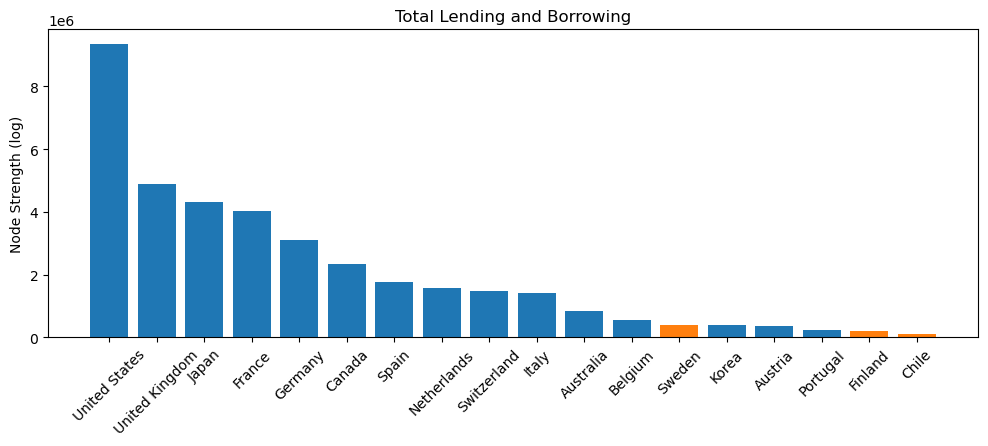

In [39]:
import numpy as np

# Identify disconnected countries.
isolates = set(nx.isolates(G_1e5))

# Calculate total lending and borrowing.
country_size = sorted(
    list(G.degree(weight = 'weight')),
    key = lambda pair: pair[1],
    reverse = True)

plt.figure(figsize = (12, 4))
plt.title('Total Lending and Borrowing')
xticks = np.arange(len(country_size))
plt.bar(xticks, [0 if name in isolates else size for name, size in country_size])
plt.bar(xticks, [size if name in isolates else 0 for name, size in country_size])
plt.xticks(xticks, [name for name, size in country_size], rotation = 45)
plt.ylabel('Node Strength (log)')
plt.show()

We can see there is significant heterogeneity in node strength.
There are a small number of nodes with high strength, followed by a long tail of other nodes.
Since these countries are entirely connected by relatively smaller loans, they will become disconnected entirely sooner than the network density should suggest.
This explains why the 3 countries that have become disconnected, Sweden, Finland, and Chile, are all the smallest participants in the exposure dataset.

# **EXERCISE 2**

Answer the following questions:

2.a If you are heavily invested in Australian bonds, should you worry about the economic situation in Spain? \
2.b You want to invest in the Korean economy. Which countries should you closely monitor before doing so?

## Our Solution

There are two things to consider when estimating the risks in this network.
First is each country's own risk of default, which increases as its net borrowing increases with respect to the size of its economy.
This limits its ability to take on further loans to avoid defaults.
Second is the risk of a country's debtors defaulting, leaving it less able to handle its own liabilities.
Thus, risk in the network propagates backwards through loans from indebted countries.

The challenge, as we learned from exercise 4, is that there is significant heterogeneity in economic size of countries.
This affects the significance of each edge with respect to propagating risk.
For example, the large GDP of the USA means both that its own borrowing and the large size of its investments are less risky.
Thus, instead of the absolute value of each investment, we normalize each edge by the total lending of the borrower country.


In [40]:
in_strength = G.in_degree(weight = 'weight')
out_strength = G.out_degree(weight = 'weight')

inherent_risk = {
  node: in_strength[node] / out_strength[node]
  for node in G.nodes
}

for src, tar, wgt in G.edges.data('weight'):
    G.edges[src, tar]['norm_weight'] = wgt / out_strength[src]

propagated_risk = nx.pagerank(
  G = G.reverse(), 
  alpha = 0.65,
  nstart = inherent_risk,
  weight = 'norm_weight'
)

Thus, to estimate the "inherent risk", we simply look at the ratio of borrowing to lending. 
In the absence of each country's GDP data, this seems like fair estimation of the risk of country being unable to repay its liabilities.

To estimate the "propagated risk", we must first address the previous problem of heterogeneity.
So we assume that the out strength of each node (its total lending) is a suitable proxy for its economic strength.
Now the fraction of the lenders' total lending a loan represents can be used as the significance of each edge.
This value as well as the debt ratio, can be used along with PageRank (`nx.pagerank`) to model the backwards propagation of risk through the exposure network.

The result is plotted below, coloured blue/red to represent increasing risk of countries and loans.
For simplicity, disparity filtering is used to filter edges rather than a single threshold value, to better handle heterogeneity.
The visualization summarizes major concerns when investing in countries.

Filtered network: 47 edges remain out of 306


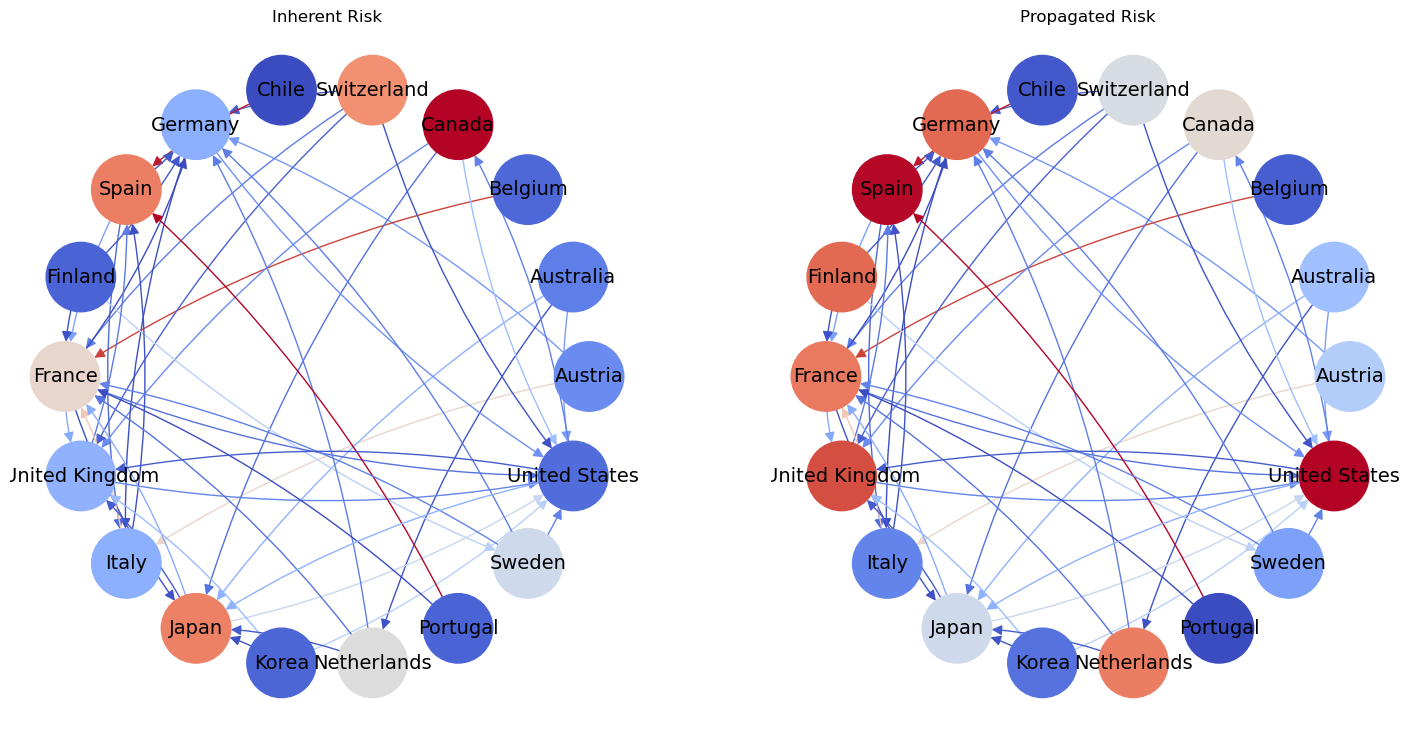

In [41]:
import matplotlib as mpl


def disparity_filter(G, alpha):
    s = G.out_degree(weight = 'weight')
    k = G.out_degree(weight = None)

    def pij(i, j):
        w = G.edges[i, j]['weight']
        return ((1 - (w / s[i])) ** (k[i] - 1)) < alpha

    return nx.subgraph_view(G, filter_edge = pij)


G_filt = disparity_filter(G, .1)
print('Filtered network:', len(G_filt.edges), 'edges remain out of', len(G.edges))


plt.figure(3, figsize = (18, 9))
plt.subplot(1, 2, 1)
plt.title('Inherent Risk')
nx.draw(
  G_filt,
  pos = nx.circular_layout(G_filt),
  node_size = 2500,
  node_color = [inherent_risk[node] for node in G_filt.nodes],
  cmap = mpl.cm.coolwarm,
  with_labels = True,
  font_color = 'black',
  font_size = 14,
  edge_color = [wgt for _, _, wgt in G_filt.edges.data('norm_weight')],
  edge_cmap = mpl.cm.coolwarm,
  arrowsize = 15,
  connectionstyle="arc3,rad=0.1")

plt.subplot(1, 2, 2)
plt.title('Propagated Risk')
nx.draw(
  G_filt,
  pos = nx.circular_layout(G_filt),
  node_size = 2500,
  node_color = [propagated_risk[node] for node in G_filt.nodes],
  cmap = mpl.cm.coolwarm,
  with_labels = True,
  font_color = 'black',
  font_size = 14,
  edge_color = [wgt for _, _, wgt in G_filt.edges.data('norm_weight')],
  edge_cmap = mpl.cm.coolwarm,
  arrowsize = 15,
  connectionstyle="arc3,rad=0.1")
plt.show()

Thus, in this model Spain, Switzerland, Canada, and Japan are the principal sources of risk.
However, more countries are exposed to a systemic shock that are not themselves considered risky investments.
This includes United States, United Kingdom, and Germany, whose banks are significant participants in the bond network.

So, relatively speaking, Spain is not a significant concern for those heavily invested in Australian bonds.
Whilst Spain is a relative borrower, Australia itself is not significantly invested in Spain.
Furthermore, the shortest path between Australia and Spain is through the United Kingdom, though the significance of these loans is relatively low.
More concerning for Australian investors is Japan, which is a net borrower and the largest recipient of Australian loans.
Japan should also be the largest concern of possible Korean investors.
Although the United Kingdom and United States are larger debtors of Korean banks, Japan is the most exposed.